### ch07_LSTM_GRU_imdb

## LSTM

In [3]:
from tensorflow.keras import datasets
from tensorflow.keras import preprocessing 

vocab_size = 20000 #特徵大小
maxlen = 80 #序列長度
batch_size = 128 #批次大小

(x_train, y_train), (x_test, y_test) = datasets.imdb.load_data(num_words=vocab_size)

print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')
num_x_train = int(len(x_train) // 10)
num_x_test = int(len(x_test) // 10)
x_train, y_train = x_train[:num_x_train], y_train[:num_x_train]
x_test, y_test = x_test[:num_x_test], y_test[:num_x_test]

print('Pad sequences (samples x time)')
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (2500, 80)
x_test shape: (2500, 80)


In [26]:
word_index = datasets.imdb.get_word_index() # index_from=3
decode_word_map = dict([(value, key) for (key, value) in word_index.items()])
for index in x_train[13]:
    print("%s(%d)"%(decode_word_map.get(index-3,"?"),index), end=" ")

a(6) good(52) thing(155) this(14) turkey(2803) was(16) shot(324) on(23) video(374) because(88) otherwise(900) what(51) a(6) waste(437) of(7) expensive(3269) film(22) it(12) would(62) be(30) if(48) that(15) guy(232) who(37) thinks(1291) artists(2719) ought(3882) to(8) be(30) interested(928) in(11) this(14) slop(17953) is(9) really(66) serious(622) no(57) wonder(594) most(91) people(84) think(104) artists(2719) are(26) insane(2140) we(75) saw(219) this(14) lousy(2320) movie(20) then(95) put(276) on(23) zero(1456) woman(255) the(4) accused(3612) oh(449) my(61) god(558) it(12) was(16) a(6) ?(2) as(17) to(8) which(63) one(31) was(16) worse(433) what(51) is(9) going(170) on(23) in(11) japan(1898) these(134) days(504) sick(1195) sick(1195) sick(1195) 

In [29]:
from tensorflow import keras
from tensorflow.keras import layers, models

inputs = keras.Input(shape=(80,))
d = layers.Embedding(input_dim=vocab_size, output_dim=128)(inputs)
d = layers.LSTM(units=128, dropout=0.2, recurrent_dropout=0.2)(d)
outputs = layers.Dense(units=1, activation="sigmoid")(d)
model = models.Model(inputs, outputs)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 80)]              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 80, 128)           2560000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [30]:
history=model.fit(x_train, y_train, batch_size=batch_size, epochs=6, validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size,verbose=0)
print('Test score:', score)
print('Test accuracy:', acc)

Train on 2500 samples, validate on 2500 samples
Epoch 1/6
2500/2500 [==============================] - 22s 9ms/sample - loss: 0.6903 - accuracy: 0.5324 - val_loss: 0.6854 - val_accuracy: 0.4956
Epoch 2/6
2500/2500 [==============================] - 12s 5ms/sample - loss: 0.6062 - accuracy: 0.7284 - val_loss: 0.5111 - val_accuracy: 0.7572
Epoch 3/6
2500/2500 [==============================] - 13s 5ms/sample - loss: 0.3731 - accuracy: 0.8776 - val_loss: 0.5272 - val_accuracy: 0.7324
Epoch 4/6
2500/2500 [==============================] - 13s 5ms/sample - loss: 0.2732 - accuracy: 0.9164 - val_loss: 0.5035 - val_accuracy: 0.7832
Epoch 5/6
2500/2500 [==============================] - 13s 5ms/sample - loss: 0.1430 - accuracy: 0.9604 - val_loss: 0.5229 - val_accuracy: 0.7872
Epoch 6/6
2500/2500 [==============================] - 13s 5ms/sample - loss: 0.0753 - accuracy: 0.9808 - val_loss: 0.5842 - val_accuracy: 0.7784
Test score: 0.5841595767974853
Test accuracy: 0.7784


In [31]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

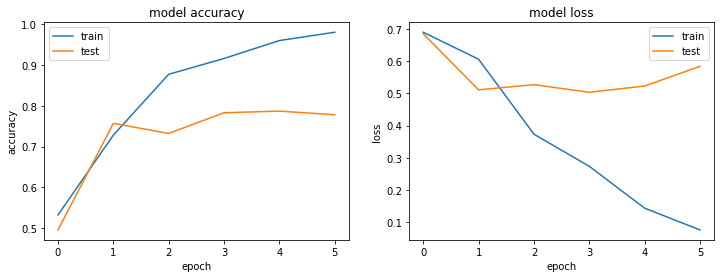

In [34]:
import matplotlib.pyplot as plt
def visual_train_state(history):
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')
            
    plt.subplot(122)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.show()
    
visual_train_state(history)

In [39]:
index = 13
test_data = x_test[index:index+10]
preds = model.predict(test_data)
print("labels",[str(label) for label in y_test[index:index+10]])
print("preds ",["1" if pred>0.5 else "0" for pred in preds])

labels ['0', '1', '0', '1', '0', '0', '0', '1', '1', '1']
preds  ['0', '1', '0', '1', '1', '0', '0', '1', '1', '1']


## GRU

In [42]:
inputs = keras.Input(shape=(80,))
d = layers.Embedding(input_dim=vocab_size, output_dim=128)(inputs)
d = layers.GRU(units=128, dropout=0.2, recurrent_dropout=0.2)(d)
outputs = layers.Dense(units=1, activation="sigmoid")(d)
model = models.Model(inputs, outputs)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 80)]              0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 80, 128)           2560000   
_________________________________________________________________
gru (GRU)                    (None, 128)               99072     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,659,201
Trainable params: 2,659,201
Non-trainable params: 0
_________________________________________________________________


In [43]:
history=model.fit(x_train, y_train, batch_size=batch_size, epochs=6, validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size,verbose=0)
print('Test score:', score)
print('Test accuracy:', acc)

Train on 2500 samples, validate on 2500 samples
Epoch 1/6
2500/2500 [==============================] - 20s 8ms/sample - loss: 0.6888 - accuracy: 0.5388 - val_loss: 0.6827 - val_accuracy: 0.6068
Epoch 2/6
2500/2500 [==============================] - 11s 5ms/sample - loss: 0.5817 - accuracy: 0.7652 - val_loss: 0.6199 - val_accuracy: 0.6744
Epoch 3/6
2500/2500 [==============================] - 12s 5ms/sample - loss: 0.3359 - accuracy: 0.8872 - val_loss: 0.5700 - val_accuracy: 0.6952
Epoch 4/6
2500/2500 [==============================] - 10s 4ms/sample - loss: 0.2312 - accuracy: 0.9316 - val_loss: 0.5639 - val_accuracy: 0.6932
Epoch 5/6
2500/2500 [==============================] - 10s 4ms/sample - loss: 0.1350 - accuracy: 0.9616 - val_loss: 0.5684 - val_accuracy: 0.7048
Epoch 6/6
2500/2500 [==============================] - 9s 4ms/sample - loss: 0.0579 - accuracy: 0.9848 - val_loss: 0.5849 - val_accuracy: 0.7112
Test score: 0.5849180983543396
Test accuracy: 0.7112


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


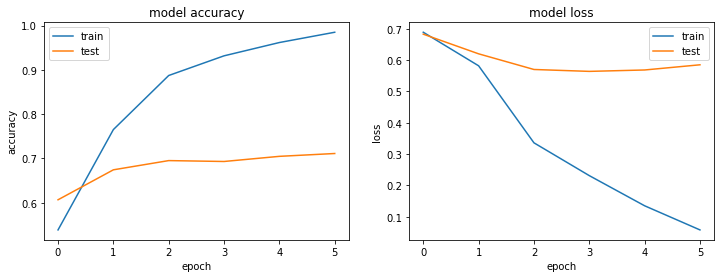

In [44]:
print(history.history.keys())
visual_train_state(history)

In [45]:
index = 13
test_data = x_test[index:index+10]
preds = model.predict(test_data)
print("labels",[str(label) for label in y_test[index:index+10]])
print("preds ",["1" if pred>0.5 else "0" for pred in preds])

labels ['0', '1', '0', '1', '0', '0', '0', '1', '1', '1']
preds  ['1', '1', '0', '1', '0', '0', '0', '1', '1', '1']
